In [2]:
import pandas as pd
import numpy as np

In [64]:
%%time 

import numpy as np
import pandas as pd
df_rev = []
r_dtypes = {"stars": np.float16, 
            "useful": np.int32, 
            "funny": np.int32,
            "cool": np.int32,
           }
with open("yelp_academic_dataset_review.json", "r") as dataset:
    reader = pd.read_json(dataset, orient="records", lines=True, 
                          dtype=r_dtypes, chunksize=10000)
        
    for chunk in reader:
        reduced_chunk = chunk.drop(columns=['business_id','review_id', 'user_id']).query("`date` >= '2018-12-01'")
        df_rev.append(reduced_chunk)
    
df_rev = pd.concat(df_rev, ignore_index=True)

CPU times: user 1min 34s, sys: 14.6 s, total: 1min 49s
Wall time: 1min 49s


In [65]:
# show head dataframe
df_rev.head()

,stars,useful,funny,cool,text,date
0,5.0,0,0,0,Vegan donuts! What else can I say!?!? I am so ...,2018-12-04 03:27:14
1,5.0,0,0,0,I will definitely be coming back! If you like...,2018-12-02 18:11:06
2,3.0,0,0,0,The waiter who greeted me was very helpful and...,2018-12-04 21:13:20
3,2.0,0,0,0,Had a salad to go today. Guy behind the counte...,2018-12-10 23:25:48
4,4.0,0,0,0,I could honestly spend my whole paycheck here....,2018-12-04 18:39:58


Text(0, 0.5, 'value')

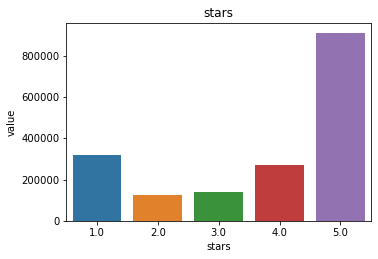

In [66]:
# plot stars using matplot

import matplotlib.pyplot as plt
import seaborn as sb

fig = plt.figure(figsize = (12,8))
sp = plt.subplot(2,2,1)
sp = sb.countplot(x = 'stars', data = df_rev)
sp.set_title('stars')
sp.set_ylabel('value')

In [67]:
# We need to classify positive and negative reviews and don't need to have 5 type of evaluation. We can reduce the domain of stars value in 2 different classes:
# 1. Negative Review - Value between 0 and 2, it should be equal to 0
# 2. Positive Review - Value between 3 and 5, it should be equal to 1
df_rev.loc[df_rev['stars'] < 3, 'stars'] = 0
df_rev.loc[df_rev['stars'] >= 3, 'stars'] = 1


In [68]:
df_rev.head(1000000)

,stars,useful,funny,cool,text,date
0,1.0,0,0,0,Vegan donuts! What else can I say!?!? I am so ...,2018-12-04 03:27:14
1,1.0,0,0,0,I will definitely be coming back! If you like...,2018-12-02 18:11:06
2,1.0,0,0,0,The waiter who greeted me was very helpful and...,2018-12-04 21:13:20
3,0.0,0,0,0,Had a salad to go today. Guy behind the counte...,2018-12-10 23:25:48
4,1.0,0,0,0,I could honestly spend my whole paycheck here....,2018-12-04 18:39:58
...,...,...,...,...,...,...
999995,0.0,1,1,0,Food was ok. Strips were soggy. Service was n...,2019-10-07 18:44:55
999996,1.0,2,2,0,Really cool penthouse suite for our honeymoon....,2019-10-06 18:15:30
999997,1.0,0,0,0,Dr Tubbs is a excellent Dr that listens and di...,2020-01-02 03:07:18
999998,0.0,1,3,0,"Bartenders were great, but service was def not...",2019-07-14 04:32:19


Text(0, 0.5, 'count')

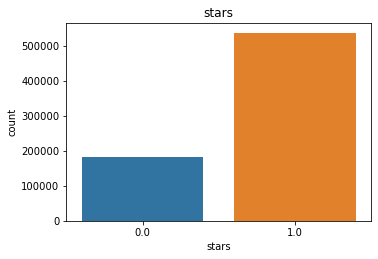

In [69]:
fig = plt.figure(figsize=(12,8))
sp = plt.subplot(2,2,1)
sp = sb.countplot(x='stars', data=b_pandas)
sp.set_title('stars')
sp.set_ylabel('count')

In [77]:
# balance the number of positive and negative reviews
df_pos = df_rev.loc[df_rev['stars'] == 1.0]
df_neg = df_rev.loc[df_rev['stars'] == 0.0]

# positive review
df_pos.head()

,stars,useful,funny,cool,text,date
0,1.0,0,0,0,Vegan donuts! What else can I say!?!? I am so ...,2018-12-04 03:27:14
1,1.0,0,0,0,I will definitely be coming back! If you like...,2018-12-02 18:11:06
2,1.0,0,0,0,The waiter who greeted me was very helpful and...,2018-12-04 21:13:20
4,1.0,0,0,0,I could honestly spend my whole paycheck here....,2018-12-04 18:39:58
5,1.0,0,0,0,I've been going to Enamel Dentistry for about ...,2018-12-05 04:18:31


In [74]:
# negative reviews
df_neg.head()

,stars,useful,funny,cool,text,date
3,0.0,0,0,0,Had a salad to go today. Guy behind the counte...,2018-12-10 23:25:48
8,0.0,0,0,0,Go to any other chili's but this location. Ser...,2018-12-11 04:31:42
25,0.0,0,0,0,The food here is reflective of the low prices ...,2018-12-15 02:25:15
30,0.0,0,0,0,Although the food and decor of this establishm...,2018-12-02 22:18:01
31,0.0,0,0,0,My pizza has literally never shown up 3 times....,2018-12-02 03:07:55


In [130]:
# taking a balanced subset of positive and negative reviews
max = 100000
df_subpos = df_pos.head(max)

In [131]:
df_subpos.size

600000

In [132]:
df_subneg = df_subneg.head(max)
df_subneg.size


600000

In [133]:
# concatenation of positive and negative subsets of reviews
df = pd.concat([df_subpos, df_subneg])

In [135]:
# total size of dataframe
df.size


1200000

In [138]:
# Same number of positive and negative reviews
df_subneg.size == df_subpos.size

True

7927074